# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

<h1>Lego..</h1>
<img src="https://i.imgur.com/49FNOHj.jpg">

In [1]:

import pandas as pd
colors_df = pd.read_csv('data/colors.csv')
sets_df = pd.read_csv('data/sets.csv')
themes_df = pd.read_csv('data/themes.csv')


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [3]:
colors_df['name'].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [4]:
colors_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

**Challenge**: Change this into an h3 section heading: 
<h3>Understanding LEGO Themes vs. LEGO Sets<h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png
<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png
<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [5]:
sets_df

set_num                                 name  year  theme_id  \
0            001-1                                Gears  1965         1   
1           0011-2                    Town Mini-Figures  1978        84   
2           0011-3           Castle 2 for 1 Bonus Offer  1987       199   
3           0012-1                   Space Mini-Figures  1979       143   
4           0013-1                   Space Mini-Figures  1979       143   
...            ...                                  ...   ...       ...   
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
0             43  
1             12  
2              0  
3             12  
4             12  
...          ...  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  

[15710 rows x 5 columns]

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [6]:
sets_df.sort_values('year').head(10)

set_num                                         name  year  theme_id  \
9521    700.1-1                   Extra-Large Gift Set (ABB)  1949       365   
9534    700.2-1                         Large Gift Set (ABB)  1949       365   
9539    700.3-1                        Medium Gift Set (ABB)  1949       365   
9544    700.A-1                        Small Brick Set (ABB)  1949       371   
9545    700.B-1            Small Doors and Windows Set (ABB)  1949       371   
9526  700.1.2-1                     Single 2 x 2 Brick (ABB)  1950       371   
9546  700.B.1-1  Single 1 x 4 x 2 Window without Glass (ABB)  1950       371   
9523  700.1.1-1                     Single 2 x 4 Brick (ABB)  1950       371   
9548  700.B.3-1  Single 1 x 2 x 2 Window without Glass (ABB)  1950       371   
9549  700.B.4-1    Single 1 x 2 x 4 Door without Glass (ABB)  1950       371   

      num_parts  
9521        142  
9534        178  
9539        142  
9544         24  
9545         12  
9526          1  
9546          1  
9523          1  
9548          1  
9549          1

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [7]:
sets_df[sets_df.year == 1949]

set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [8]:
sets_df.sort_values('num_parts', ascending=False).head(5)

set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [9]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [10]:
import matplotlib.pyplot as plt

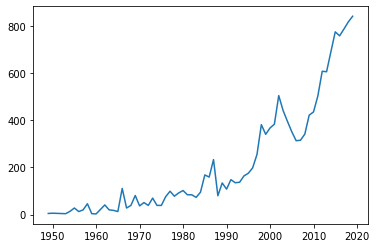

In [11]:
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [12]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.head()

theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4

In [13]:
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
themes_by_year.head()

nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

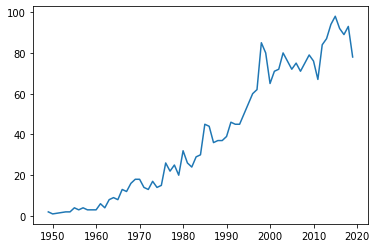

In [14]:
plt.plot(themes_by_year.index[:-2], themes_by_year.values[:-2])

### Line Charts with Two Seperate Axes

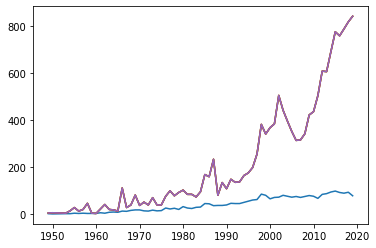

In [15]:
plt.plot(themes_by_year.index[:-2], themes_by_year.values[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.values[:-2])

Text(0, 1, '# of sets')

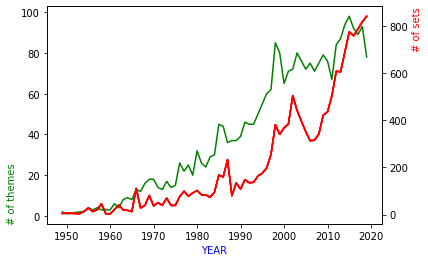

In [16]:
# REF TO AXIS
ax1 = plt.gca()
ax2 = ax1.twinx()
# BIND DATA
ax1.plot(themes_by_year.index[:-2], themes_by_year.values[:-2], color='g')
ax2.plot(sets_by_year.index[:-2], sets_by_year.values[:-2], color='r')
# STYLE
ax1.set_xlabel('YEAR', color='blue', loc='center')
ax1.set_ylabel('# of themes', color='green', loc='bottom')
ax2.set_ylabel('# of sets', color='red', loc='top')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [17]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set

num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
...          ...
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000

[71 rows x 1 columns]

In [18]:
parts_per_set.index[:-2]

Int64Index([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019],
           dtype='int64', name='year')

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

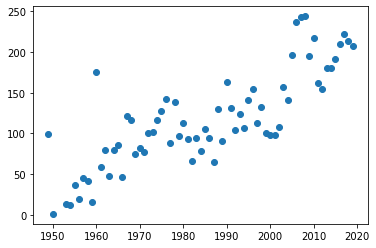

In [19]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.values[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [20]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

 <img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [21]:
themes_df.columns

Index(['id', 'name', 'parent_id'], dtype='object')

In [22]:
themes_df[themes_df.name == 'Star Wars']

id       name  parent_id
17    18  Star Wars        1.0
150  158  Star Wars        NaN
174  209  Star Wars      207.0
211  261  Star Wars      258.0

In [23]:
sets_df[sets_df.theme_id == 209]

set_num                            name  year  theme_id  num_parts
11013  75023-1  Star Wars Advent Calendar 2013  2013       209        254
11046  75056-1  Star Wars Advent Calendar 2014  2014       209        273
11080  75097-1  Star Wars Advent Calendar 2015  2015       209        291
11131  75146-1  Star Wars Advent Calendar 2016  2016       209        282
11173  75184-1  Star Wars Advent Calendar 2017  2017       209        309
11206  75213-1  Star Wars Advent Calendar 2018  2018       209        307
11245  75245-1  Star Wars Advent Calendar 2019  2019       209        280
11281  75279-1  Star Wars Advent Calendar 2020  2020       209        312
12019   7958-1  Star Wars Advent Calendar 2011  2011       209        267
14352   9509-1  Star Wars Advent Calendar 2012  2012       209        235

### Merging (i.e., Combining) DataFrames based on a Key


In [24]:
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [27]:
new_set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
new_set_theme_count

id  set_count
0    158        753
1    501        656
2    494        398
3    435        356
4    503        329
..   ...        ...
566  307          1
567  215          1
568  361          1
569  210          1
570  414          1

[571 rows x 2 columns]

In [30]:
merged_df = pd.merge(new_set_theme_count, themes_df, on='id')
merged_df

id  set_count           name  parent_id
0    158        753      Star Wars        NaN
1    501        656           Gear        NaN
2    494        398        Friends        NaN
3    435        356        Ninjago        NaN
4    503        329      Key Chain      501.0
..   ...        ...            ...        ...
566  307          1       Aquazone        NaN
567  215          1        Pirates      207.0
568  361          1  Skull Spiders      324.0
569  210          1       Belville      207.0
570  414          1         Castle      411.0

[571 rows x 4 columns]

<BarContainer object of 10 artists>

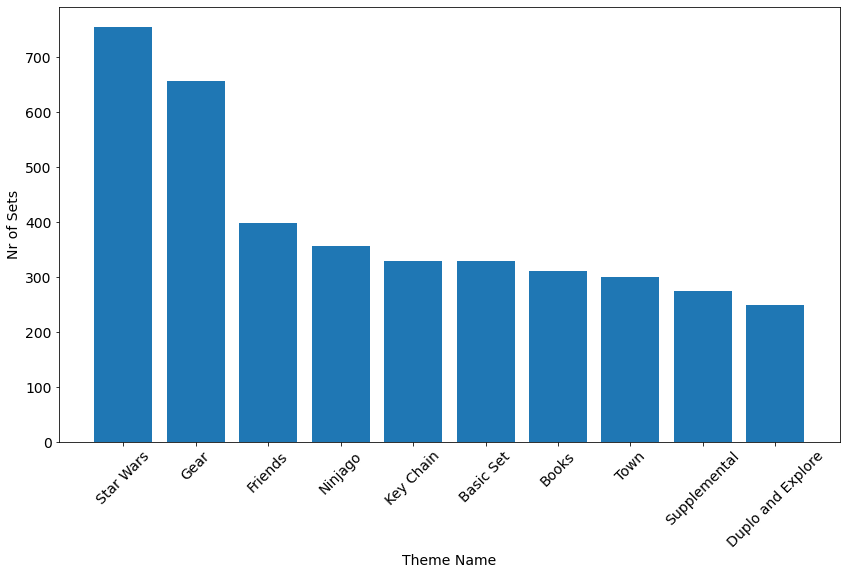

In [35]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])